In [ ]:
''' We have seen that our first model tends to fail on water and shadows as we zoom in, 
we can however combine an arbitrary amount of images from different zoom levels to train a perhaps better model!'''

In [10]:
# first, lets clone our git repo 
!git clone https://github.com/NSCC-COGS/Aestheta.git

Cloning into 'Aestheta'...
remote: Enumerating objects: 332, done.
remote: Counting objects: 100% (332/332), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 332 (delta 172), reused 220 (delta 87), pack-reused 0
Receiving objects: 100% (332/332), 6.01 MiB | 12.07 MiB/s, done.
Resolving deltas: 100% (172/172), done.


In [11]:
# lets move to the directory we cloned 
%cd /content/Aestheta/

# lets pull the git again in case any changes have been
!git pull

/content/Aestheta
Already up to date.


0 0 0


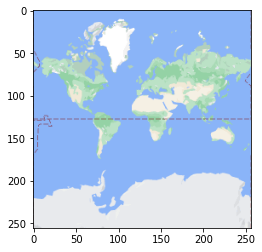

In [12]:
# check to see if the code is working by running simple getTile()

import Aestheta.Library.core as core
core.getTile(show=True)

In [13]:
# lets get some satellite (sat) and map tiles of a zoomed in area
aRGB = core.getTile(xyz=[-63.5752,44.6488,12], source='google_sat')
mRGBA = core.getTile(xyz=[-63.5752,44.6488,12], source='google_map')

1324 1479 12
1324 1479 12


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


applying classification...


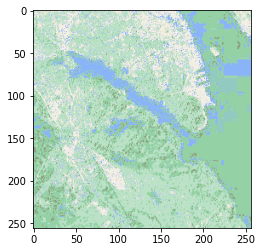

In [14]:
# now lets apply the current default classificaiton to the sat image
# NOTE this may not function in the same way in the future as our default model changes!
c = core.classifyImage(aRGB)
from matplotlib import pyplot as plt
plt.imshow(c)
plt.show()

In [15]:
# as we expect, the results arent great. 
# lets try generateing a new classification based on the new tiles

model,classes = core.simpleClassifier(aRGB, mRGBA)

training  classifier...
      Iter       Train Loss   Remaining Time 
         1        1542.4524           13.68s
         2        1460.0378           12.72s
         3        1398.3188           12.79s
         4        1346.8019           12.69s
         5        1303.0808           12.46s
         6        1268.9714           12.22s
         7        1238.5431           12.01s
         8        1212.8244           11.83s
         9        1190.4174           11.67s
        10        1170.1128           11.51s
        20        1035.1192           10.07s
        30         951.7113            8.78s
        40         889.2815            7.48s
        50         837.3997            6.23s
        60         795.0640            4.98s
        70         758.8800            3.73s
        80         727.5727            2.49s
        90         700.3796            1.24s
       100         675.8854            0.00s


applying classification...


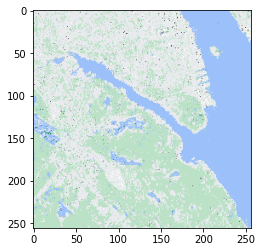

In [16]:
# when we apply this classification to the sat tile, things look better  

d = core.classifyImage(aRGB, model, classes)
from matplotlib import pyplot as plt
plt.imshow(d)
plt.show()

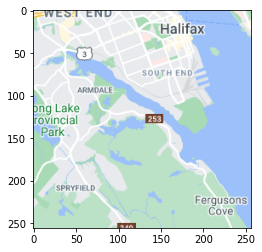

In [17]:
# lets compare it to the map tile it was trained to match

plt.imshow(mRGBA)
plt.show()

0 0 0
applying classification...


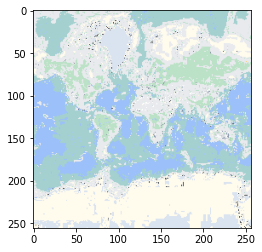

In [19]:
# but when we apply this new classification to the earth tile...
# things don't hold up so well...

worldRGB = core.getTile(source = 'google_sat')
cWorld = core.classifyImage(worldRGB, model, classes)
from matplotlib import pyplot as plt
plt.imshow(cWorld)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


applying classification...


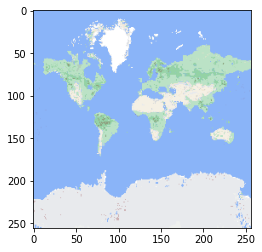

In [20]:
# our current default classifier was trained using the full earth tile (0,0,0)
# if we try that classifier with the whole earth sat image, we get nice results

cWorld_default = core.classifyImage(worldRGB)
from matplotlib import pyplot as plt
plt.imshow(cWorld_default)
plt.show()

0 0 0


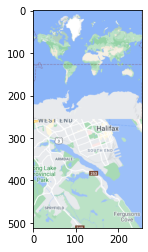

In [30]:
# what we can do is simply SMASH the two scenes together! 

import numpy as np
hRGB = np.append(worldRGB,aRGB, axis=0)

worldRGBA = core.getTile(source = 'google_map')
hRGBA = np.append(worldRGBA,mRGBA, axis=0)

plt.imshow(hRGBA)
plt.show()

In [31]:
# and train a new model that incorperates both!

model_h,classes_h = core.simpleClassifier(hRGB, hRGBA)

training  classifier...
      Iter       Train Loss   Remaining Time 
         1        3080.1107           42.86s
         2        2857.8149           43.23s
         3        2732.3296           42.04s
         4        2627.1584           41.30s
         5        2537.9615           40.62s
         6        2463.2803           40.15s
         7        2397.5246           39.57s
         8        2335.3940           38.98s
         9        2280.9842           38.39s
        10        2232.1039           38.27s
        20        1911.1624           33.09s
        30        1722.8591           28.64s
        40        1582.6000           24.40s
        50        1470.3467           20.23s
        60        1379.1086           16.16s
        70        1303.5859           12.07s
        80        1241.2777            8.02s
        90        1188.3977            4.01s
       100        1142.1961            0.00s


applying classification...


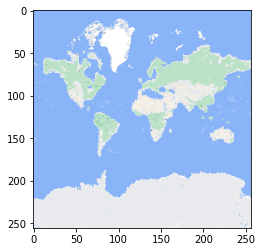

In [33]:
# now when we appyly this new hybrid model to the whole earth tile
# we get slighly ok results! 

cWorld_h = core.classifyImage(worldRGB, model_h, classes_h)
plt.imshow(cWorld_h)
plt.show()

applying classification...


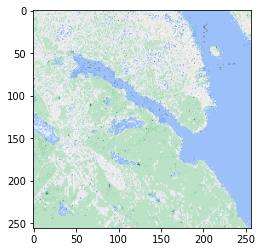

In [34]:
# and the results when we look at the halifax area zoom
# are ok we well! 

cRGBA_h = core.classifyImage(aRGB, model_h, classes_h)
plt.imshow(cRGBA_h)
plt.show()

518 352 10
applying classification...


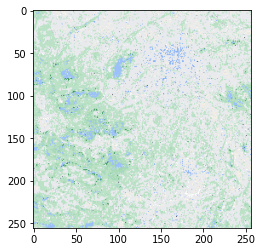

In [37]:
# lets jump to annother part of the world
# we will see that our results are ok with the new model, 
# but we do see some errors, here some forests appear as water

parisRGB = core.getTile(xyz=[2.3522,48.8566,10], source='google_sat')
parisRGBA_h = core.classifyImage(parisRGB, model_h, classes_h)
plt.imshow(parisRGBA_h)
plt.show()

518 352 10


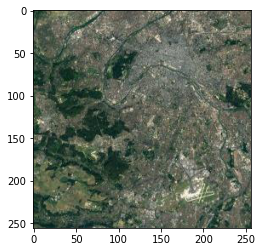

In [39]:
# as we can tell from looking at the satellite tile directly 

parisRGBA = core.getTile(xyz=[2.3522,48.8566,10], source='google_map')
plt.imshow(parisRGB)
plt.show()

In [ ]:
# so! if we want to get the most out of our simple apprach, 
# we should strive to build a more general whcih incorperates
# many various regions of earth! more data!